# Modelo lineal ajustado manualmente

## ¿Qué significa un modelo lineal?

El modelo lineal más simple siempre tiene esta forma:

$$
y = mx + b
$$

donde $y$ es el **resultado**, $x$ son los **valores de entrada**, $m$ es **la pendiente de la recta** y $b$ es el **intercepto**.

En otras palabras, $y$ será la **predicción**, y $x$ será el **valor de entrada**.

$m$ sera que tanto crece $y$ con respecto a $x$.

<p align="center">
  <img src="images/figura 1.png" width="500">
</p>

<p align="center">
  <b>Figura 1.</b> Pendiente en una recta.
</p>

Analiza la *Figura 1*. La pendiente  nos indica qué tanto crece $x$ con respecto a $y$.

El eje $x$ corresponde al eje horizontal de la gráfica, mientras que el eje $y$ corresponde al eje vertical.

Por ahora, deduciremos la pendiente de forma intuitiva. Para ello, tomaremos cualquier intervalo de $x$ que tenga exactamente una longitud de 1 y observaremos cuánto crece $y$ en ese mismo intervalo.

Tomemos el intervalo de $x=0$ a $x=1$, es decir, el intervalo $[0,1]$.

Cuando $x=0$, el valor de $y=0$. Cuando $x=1$, el valor de $y=2$. Esto significa que por cada unidad que aumenta $x$, el valor de $y$ aumenta el doble.

Por lo tanto, la pendiente de la Figura 1 es:

$$
m=2
$$

Ahora analicemos el término independiente del modelo.

El parámetro $b$ representa el valor en el que la recta corta al eje $y$, es decir, el valor que toma la función cuando $x=0$. Observa que $x=0$ corresponde exactamente al punto donde la gráfica intercepta el eje vertical.

Inicialmente lo haremos de forma intuitiva. Vuelve a observar la *Figura 1* y responde la siguiente pregunta:

> Cuando $x=0$, ¿cuál es el valor de  $y$?

De manera equivalente, esto también puede formularse como:

> ¿En qué valor de $y$ la recta corta al eje $x$?


Analizando la *Figura 1*, se deduce que el valor que cumple esta condición es:

$$
b=0
$$

No te preocupes: más adelante veremos una forma de **generalizar estos resultados** mediante una expresión matemática cuando tengamos dos puntos.

Como notarás, en nuestro modelo solo tenemos **un valor de entrada**. Podemos tener más valores de entrada, pero para eso necesitaríamos **más dimensiones**. Por ejemplo, para dos valores de entrada podríamos usar un **plano en tres dimensiones**.

<hr>

## Ejemplo sencillo con una sola variable

Hasta ahora hemos trabajado con modelos lineales desde un punto de vista matemático. La conexión con *Machine Learning* es directa: los modelos lineales son los modelos más simples dentro del *ML*.

A este tipo de modelos los llamaremos *Regresión Lineal*. Más adelante estudiaremos con detalle las matemáticas que hay detrás de ellos, pero antes es importante ver un ejemplo sencillo donde podamos aplicar todo lo que hemos aprendido hasta ahora.

Imagina que quieres programar un modelo de *machine learning* capaz de convertir **grados Celsius a Fahrenheit**. Para ello, experimentalmente, usas dos termómetros: uno que mide en grados *Celsius* y otro que mide en *Fahrenheit*, y registras sus valores correspondientes.

Supongamos que tus termómetros son *100 % precisos*. Esta suposición es importante porque nos permite asumir que los datos que estamos usando no contienen error. En ese caso, la relación entre grados Celsius y Fahrenheit es *perfectamente lineal* y basta con muy pocos ejemplos para obtener un modelo exacto.

Si los termómetros no fueran precisos, cada medición tendría un pequeño error. Esto haría que los puntos no cayeran exactamente sobre una recta, sino que quedaran dispersos alrededor de ella. En ese escenario, necesitaríamos muchos más ejemplos para que el modelo pudiera identificar la tendencia general y no verse afectado por errores individuales.

En otras palabras, cuantos más datos tengamos, mejor podrá el modelo distinguir la relación real entre las variables del ruido presente en las mediciones.

Cuando recolectas los datos, creas una tabla y obtienes los siguientes resultados:

| Grados | Fahrenheit |
| :----: | ---------: |
|    5   |         41 |
|   10   |         50 |

<hr>

Para ajustarlo manualmente, vamos a seguir los siguientes pasos:

### 1. Graficar los puntos

Para graficar los puntos usaremos [Matplotlib](https://matplotlib.org/), una biblioteca de Python ampliamente utilizada para la visualización de datos.

In [10]:
%%capture --no-display

# Instalaremos todo lo necesario para trabajar con matplotlib
%pip install matplotlib;
%pip install numpy;

In [7]:
import matplotlib.pyplot as plt
import numpy as np

[(0.0, 15.0), (0.0, 55.0)]

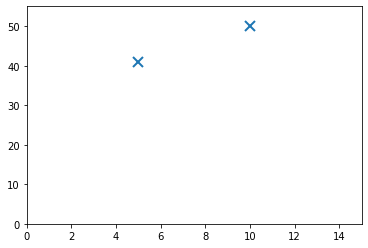

In [8]:
# valores tomados
x = [5, 10]
y = [41, 50]

fig, ax = plt.subplots()
ax.plot(x, y, "x", markeredgewidth=2, markersize=10)

ax.set(xlim=(0, 15), ylim=(0, 55))

### 2. Buscar los mejores parametros para unir los puntos

Ya sabemos que el modelo lineal de una dimensión tiene la forma:

$$
y=mx+b
$$

Nuestra tarea ahora será encontrar los mejores valores para $y$. Pero, ¿qué significa que estos valores sean buenos?

Tener buenos valores para los parámetros de un modelo lineal no significa que la recta pase exactamente por todos los puntos, sino que minimice el error global del modelo. Es decir, buscamos una recta que, en conjunto, se acerque lo más posible a todos los datos, aunque no coincida exactamente con cada uno de ellos.

En términos más formales, un buen modelo es aquel que reduce al máximo la diferencia entre los valores reales y las predicciones, considerando todos los puntos al mismo tiempo. Esta idea es fundamental en machine learning: no optimizamos punto por punto, sino el *comportamiento general del modelo*.

En el caso particular de la conversión entre grados Celsius y Fahrenheit, la relación entre ambas variables es perfectamente lineal. Esto implica que todos los puntos caen exactamente sobre una misma recta. Por esta razón, obtenemos un modelo ideal, con 0 % de error, donde las predicciones coinciden exactamente con los valores reales.

Cuando los datos son perfectos, como en este ejemplo (todas las mediciones tienen 0 % de error), basta con muy pocos puntos para determinar el modelo completo. En ese escenario, podemos calcular directamente la pendiente usando una expresión matemática simple, ya que no existe ambigüedad ni ruido en los datos.

Sin embargo, en la mayoría de situaciones reales los datos no son perfectos. 

<p align="center">
  <img src="images/figura 2.png" width="500">
</p>

<p align="center">
  <b>Figura 2.</b> Ejemplo de regresion con error: los puntos no se ajustan perfectamente a una recta.
</p>

En la *Figura 2* se muestra un caso más realista: los puntos no se ajustan exactamente a una recta, sino que quedan dispersos alrededor de ella. Esto puede deberse a errores de medición, variabilidad natural del fenómeno o factores no considerados en el modelo.

En este contexto, no existe una recta que pase por todos los puntos, y cualquier modelo lineal tendrá inevitablemente un cierto porcentaje de error. El objetivo del machine learning ya no es encontrar una recta perfecta, sino aquella que mejor represente la tendencia general de los datos, ignorando el ruido individual de cada medición.

Justamente por esta razón, cuando los datos no son exactos, necesitamos muchos más ejemplos: cuantos más puntos tengamos, mejor podrá el modelo distinguir la relación real entre las variables del ruido presente en los datos.

Cuando los datos son perfectos, como en este ejemplo, podemos calcular la pendiente usando la siguiente expresión (Si con la explicación de arriba todavía no se te hace del todo clara la idea, vale la pena que investigues un poco por tu cuenta y le des otra mirada; a veces verlo desde otro enfoque hace que todo encaje.):

$$
m = \frac{y_2 - y_1}{x_2 - x_1}
$$

La expresión con la que describimos el modelo lineal también puede escribirse de la siguiente forma:

$$
y = m(x-x_0) + y_0
$$

donde el término independiente $b$ está dado por:

$$
b=y_0 + m x_0
$$

Ahora que tenemos claras las expresiones matemáticas, llevemos todo esto a la práctica.
Hagámoslo en Python.

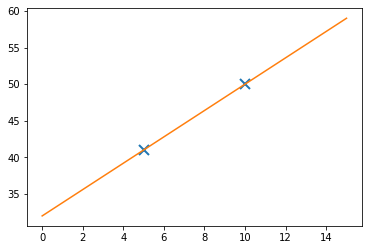

1.8 32.0


In [9]:
x = [5, 10]
y = [41, 50]

fig, ax = plt.subplots()
ax.plot(x, y, "x", markeredgewidth=2, markersize=10)

# calcular la pendiente (m) y la intersección (b)
m = (y[1] - y[0]) / (x[1] - x[0])
b = y[0] - m * x[0]

x = np.linspace(0, 15, 100)
y = m * x + b

ax.plot(x, y)
plt.show()

print(m, b)

### 3. Predecir

Ya hemos construido un modelo lineal muy básico, pero ahora surge una pregunta fundamental! ¿realmente funciona?

Comprobémoslo.

Como ya hemos dicho, $y$ representa el valor esperado, es decir, la predicción, y $x$ es nuestro valor de entrada. Por lo tanto, la expresión matemática de nuestro modelo puede traducirse a algo más concreto, como:

$$
gradosFahrenheit = m⋅{gradosCelsius} + b
$$

Si ahora reemplazamos por los valores reales obtenidos para nuestro modelo, resulta:

$$
gradosFahrenheit = 1.8⋅{gradosCelsius} + 32
$$

Con esta expresión ya podemos empezar a predecir temperaturas en Fahrenheit a partir de valores dados en grados Celsius.

In [ ]:
# grado celsius
celsius = 100
# grado fahrenheit
fahrenheit = m * celsius + b

fahrenheit

212.0

### Advertencias
Este ejemplo es muy sencillo. En el mundo real, muy pocas cosas se comportan tan bien como para poder trazar una línea recta perfecta.

Existen modelos lineales en muchas más dimensiones. Por ejemplo, en tres dimensiones, a los modelos lineales los llamamos planos, en ML los llamamos hiperplanos (un plano es un caso particular de un hiperplano). Sin embargo, la idea de fondo es exactamente la misma. Basta con comparar la expresión lineal anterior con una expresión lineal en tres dimensiones (en este caso un hiperplano):

$$
ax + by + cz = d
$$

Ahora bien, surge una pregunta razonable: ¿por qué usamos modelos lineales de más dimensiones si este modelo es mucho más simple?

La respuesta es sencilla: a veces *necesitamos más pistas* para poder predecir un resultado.

Piénsalo así: en el modelo de conversión de grados Celsius a Fahrenheit solo necesitábamos una pista, los grados Celsius.

Pero considera un caso mucho más complejo, como la felicidad de una persona. ¿Cuántas pistas necesitarías? ¿Podrías determinar si una persona es feliz con solo conocer su edad? Claramente no. Harían falta muchas variables: su edad, sus ingresos, la ciudad en la que vive, su estado familiar, entre otras.

(Estamos asumiendo, solo como ejemplo, que la felicidad se puede modelar de forma lineal, lo cual no necesariamente es cierto).

Antes de enfrentarnos a modelos con más variables, veamos un ejemplo de un modelo lineal en el que los puntos no están perfectamente alineados con una recta.

Intentemos correlacionar la felicidad con el dinero.

La pregunta clave es: ¿el dinero hace felices a las personas?